### Step 8: Exploratory data analysis through plotting

In [1]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
filename = "/Users/cmdb/qbb2020-answers/week2-hw/effectpred.vcf"
file = open(filename, 'r')


table = []
header = []
linesplit1 = []
formatcol = []
stringlist = []
readdepth = []
quality = []
annotation = []
allelefreq = []
predeffect = []
preddict = {}

for index, line in enumerate(file):
    
    # skip lines that start with ##
    if "##" in line:
        continue
        
    # line that starts with # is the header   
    elif '#' in line: 
        header = line.strip('#').split()
        header = header[-11:-1]
        continue
        
    linesplit1 = line.strip().split()
    for r in range(1, 11):
        name = header[-r]
        string = linesplit1[-r] 
        if '.:.:.:.:.:.:.:.:.' in string:
            continue
        formatcol.append(string)
    
    linesplit2 = line.strip().split(';')
    for item in linesplit2:
        if 'SAF=' in item: 
            continue
        elif 'AF=' in item: 
            allelefreq.append(item)
            
        if 'ERROR_CHROMOSOME_NOT_FOUND' in item: 
            continue
        elif 'ANN' in item:
            annotation = item.strip().split('|')
            predeffect.append(annotation[1])
            
    #for item in annotation: 
        #annotation.index('A') 
            
for string in formatcol:
    stringstrip = string.split(':')
    floatfrmstr2 = float(stringstrip[2])
    floatfrmstr1 = float(stringstrip[1])
    readdepth.append(floatfrmstr2)
    quality.append(floatfrmstr1)

file.close()


#go through predicted effects (annotations) to count them: 
for pred in predeffect: 
    if pred not in preddict:
        preddict[pred] = 0
    else:
        preddict[pred] += 1
        
print(preddict)
##INFO=<ID=ANN,Number=.,Type=String,Description="Functional annotations: 'Allele | Annotation | 
##Annotation_Impact | Gene_Name | Gene_ID | Feature_Type | Feature_ID | 
##Transcript_BioType | Rank | HGVS.c | HGVS.p | cDNA.pos / cDNA.length | 
##CDS.pos / CDS.length | AA.pos / AA.length | Distance | ERRORS / WARNINGS/ INFO' ">

{'synonymous_variant': 19, 'missense_variant': 35, 'upstream_gene_variant': 57, 'downstream_gene_variant': 3, 'frameshift_variant': 5, 'disruptive_inframe_deletion': 0}


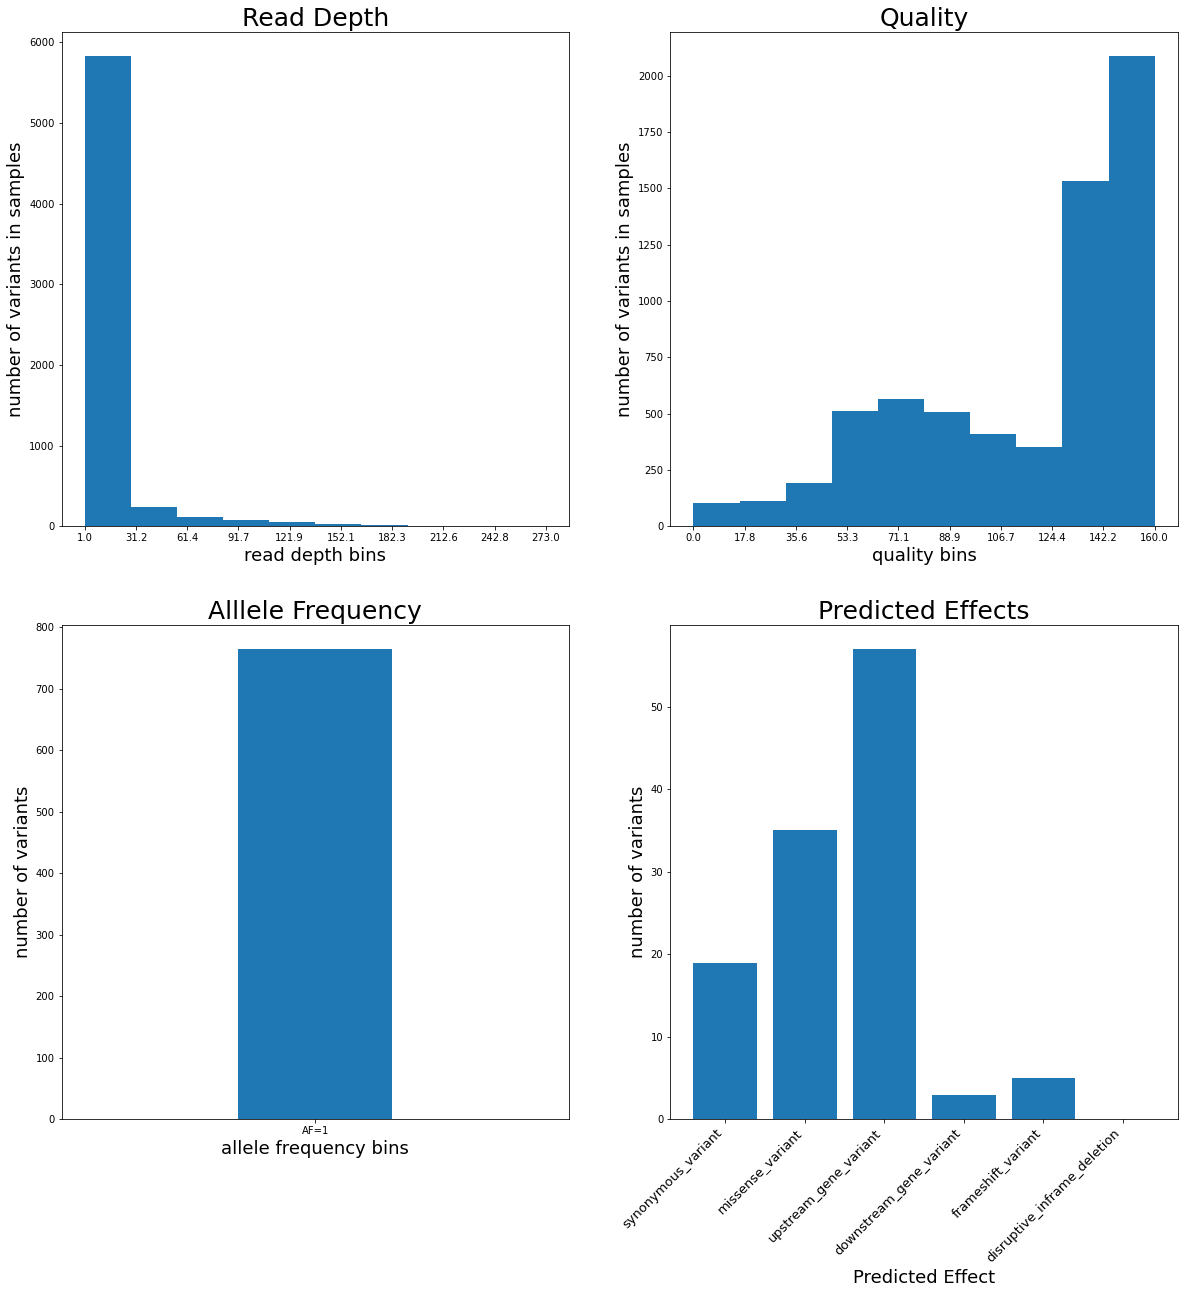

In [3]:
# create figure
fig = plt.figure(figsize = (20.0,20.0))

# set up axes and subplots
ax = fig.subplots(2,2)

ax[0,0].hist(readdepth, bins = 10) # bins changes the number of bars and "bins" your data is placed in
ax[0,1].hist(quality, bins = 10)
ax[1,0].hist(allelefreq, bins = 3)
ax[1,1].bar(preddict.keys(), preddict.values())

maxrd = float(max(readdepth))
minrd = float(min(readdepth))

maxq = float(max(quality))
minq = float(min(quality))

bins = 10
x1 = np.linspace(minrd, maxrd, bins )
x2 = np.linspace(minq, maxq, bins )

ax[0,0].set_xticks(x1)
ax[0,1].set_xticks(x2)
ax[1,1].set_xticks(range(0,6))
ax[1,1].set_xticklabels(preddict.keys(),rotation=45, ha = 'right', fontsize =13)

ax[0,0].set_xlabel('read depth bins', fontsize=18)
ax[0,0].set_ylabel('number of variants in samples', fontsize=18)
ax[0,0].set_title('Read Depth', fontsize=25)

ax[0,1].set_xlabel('quality bins', fontsize=18)
ax[0,1].set_ylabel('number of variants in samples', fontsize=18)
ax[0,1].set_title('Quality', fontsize=25)

ax[1,0].set_xlabel('allele frequency bins', fontsize=18)
ax[1,0].set_ylabel('number of variants', fontsize=18)
ax[1,0].set_title('Alllele Frequency', fontsize=25)

ax[1,1].set_xlabel('Predicted Effect', fontsize=18)
ax[1,1].set_ylabel('number of variants', fontsize=18)
ax[1,1].set_title('Predicted Effects', fontsize=25)

plt.show()
